In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_table('adult.data',delimiter=',')

In [3]:
print(data)

       39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-clerical   Not-in-family   White  

In [4]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [5]:
data.set_axis(['age','workclass','Salary','education','education-num','marital-status','occupation','relationship',
                  'race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'],axis=1,inplace=True)

In [6]:
data.head(30)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [7]:
data['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
df = data[data != ' ?']
df.head(50)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [9]:
df.dropna(how='any',inplace=True)

In [10]:
df

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1887, 1719, 1762, 1564, 2179, 1816, 1980,
       1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444, 1138,
       2238,  625,  213, 1539,  880, 1668, 1092, 1594, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 2129, 4356,
       2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754, 2472,
       3004, 1411], dtype=int64)

In [13]:
df.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    0
32557    0
32558    0
32559    0
Length: 30161, dtype: int64

In [14]:
age_bins = [0, 25, 45, 65, 150]
age_labels = ["Young", "Middle-aged", "Senior", "Old"]
df['age_categories'] = pd.cut(df['age'], age_bins, labels=age_labels, 
    right=True, include_lowest=True)

In [15]:
df.head(10)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,age_categories
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Senior
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-aged
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Senior
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Middle-aged
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Middle-aged
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Senior
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Senior
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Middle-aged
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Middle-aged
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,Middle-aged


In [16]:
print(df['age_categories'].value_counts())

Middle-aged    15754
Senior          7900
Young           5668
Old              839
Name: age_categories, dtype: int64


In [17]:
print(df['target'].value_counts().count())


2


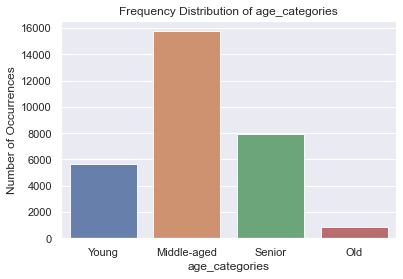

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
age_categories = df['age_categories'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_categories.index, age_categories.values, alpha=0.9)
plt.title('Frequency Distribution of age_categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('age_categories', fontsize=12)
plt.show()

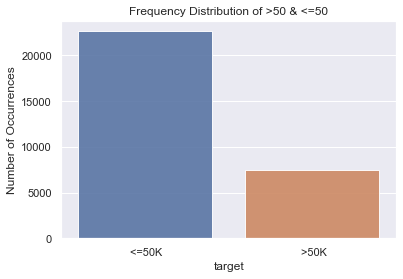

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
age_categories = df['target'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_categories.index, age_categories.values, alpha=0.9)
plt.title('Frequency Distribution of >50 & <=50')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('target', fontsize=12)
plt.show()

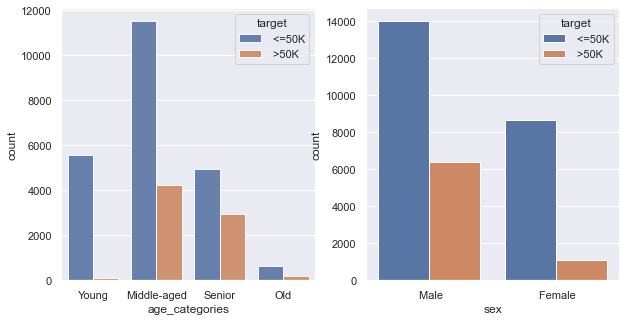

In [20]:
plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("age_categories", hue = "target", data = df, alpha=0.9)
plt.subplot(1,2,2)
sns.countplot("sex", hue = "target", data = df)

In [21]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [22]:
hours_per_week_bins = [0,25,40,60,168]
hours_per_week_labels = ["Part-time", "Full-time", "Over-time","Too much"]
df['hours-per-week_categories'] = pd.cut(df['hours-per-week'], hours_per_week_bins, labels=hours_per_week_labels, 
    right=True, include_lowest=True)

In [23]:
df.head(10)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,age_categories,hours-per-week_categories
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Senior,Part-time
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-aged,Full-time
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Senior,Full-time
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Middle-aged,Full-time
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Middle-aged,Full-time
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Senior,Part-time
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Senior,Over-time
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Middle-aged,Over-time
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Middle-aged,Full-time
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,Middle-aged,Too much


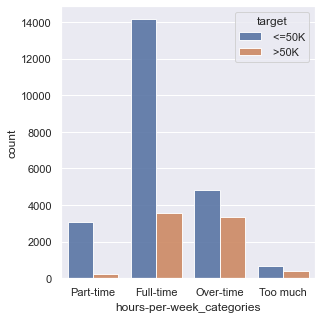

In [24]:
plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("hours-per-week_categories", hue = "target", data = df, alpha=0.9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

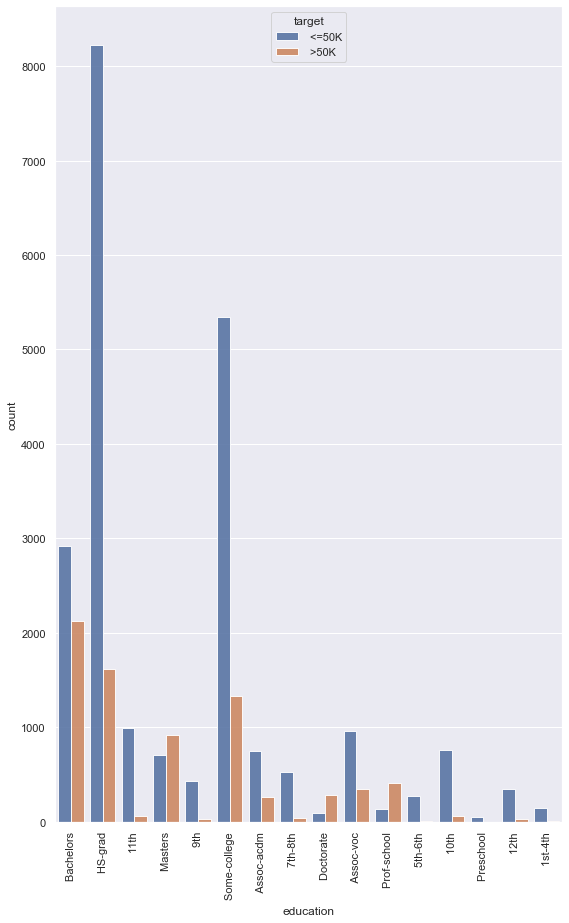

In [25]:
plt.figure(figsize = (20,15))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("education", hue = "target", data = df, alpha=0.9)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

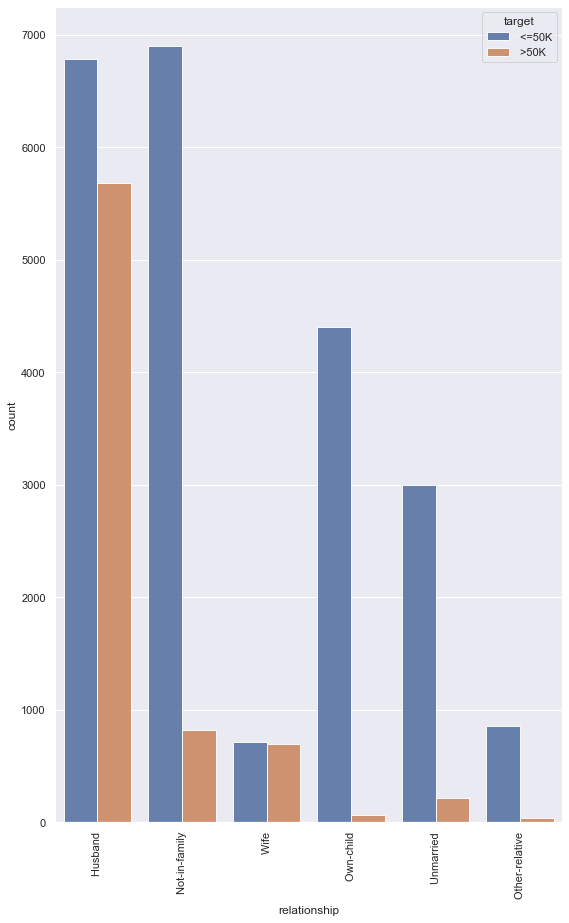

In [26]:
plt.figure(figsize = (20,15))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("relationship", hue = "target", data = df, alpha=0.9)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

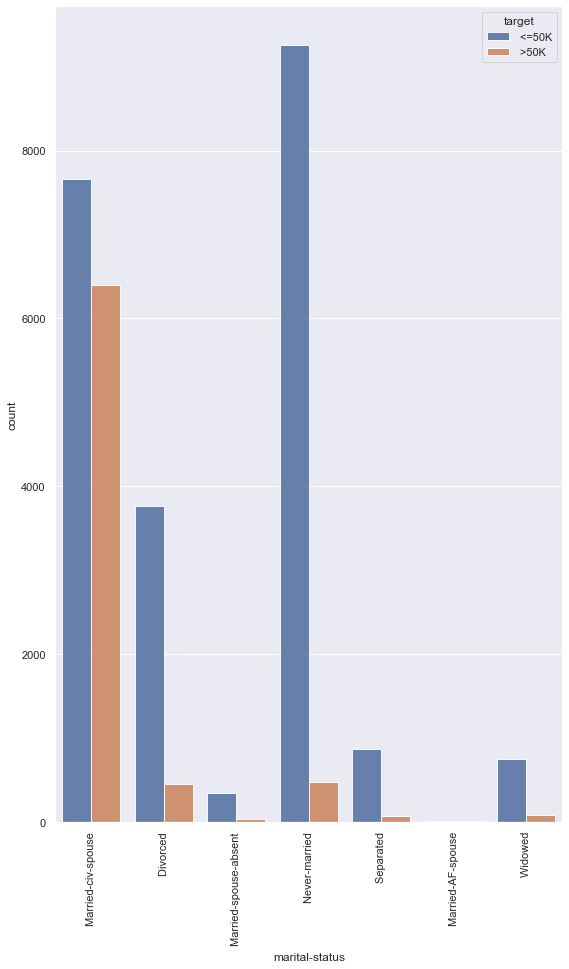

In [27]:
plt.figure(figsize = (20,15))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("marital-status", hue = "target", data = df, alpha=0.9)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

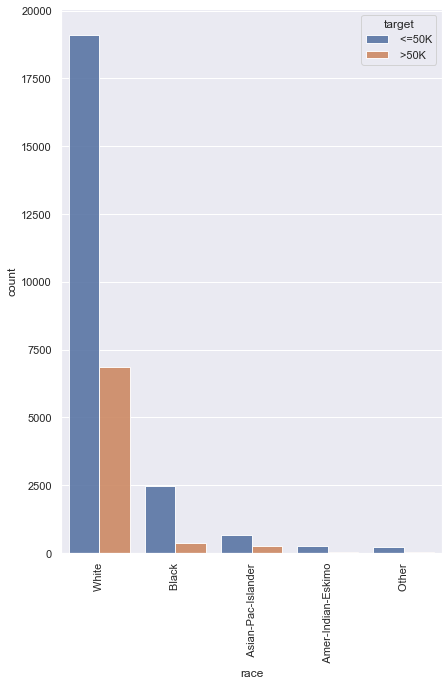

In [28]:
plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("race", hue = "target", data = df, alpha=0.9)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

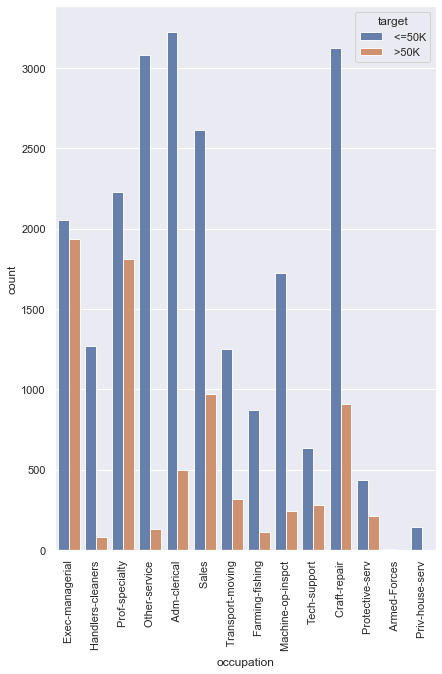

In [29]:
plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("occupation", hue = "target", data = df, alpha=0.9)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

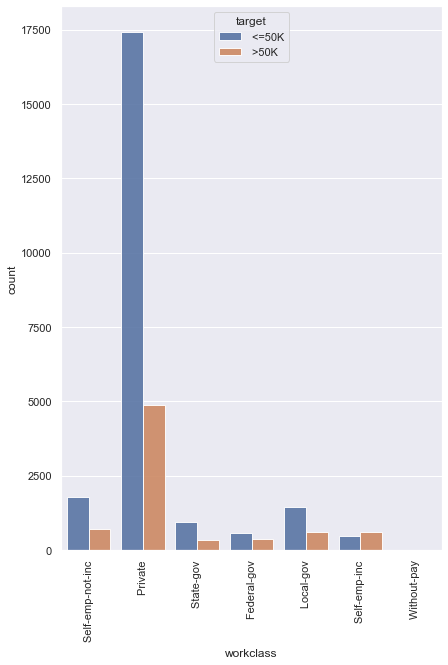

In [30]:
plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot("workclass", hue = "target", data = df, alpha=0.9)
plt.xticks(rotation=90)

In [31]:
label_df = df

In [32]:
label_df.head(20)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,age_categories,hours-per-week_categories
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Senior,Part-time
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-aged,Full-time
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Senior,Full-time
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Middle-aged,Full-time
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Middle-aged,Full-time
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Senior,Part-time
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Senior,Over-time
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Middle-aged,Over-time
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Middle-aged,Full-time
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,Middle-aged,Too much


In [33]:
from sklearn import preprocessing

In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
label_df.shape

(30161, 17)

In [36]:
label_df['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [37]:
label_df['target']= label_encoder.fit_transform(label_df['target'])

In [38]:
label_df['target'].unique()

array([0, 1])

In [39]:
label_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [40]:
label_df['sex']= label_encoder.fit_transform(label_df['sex'])

In [41]:
label_df['sex'].unique()

array([1, 0])

In [42]:
label_df['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [43]:
label_df['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [44]:
label_df['occupation']= label_encoder.fit_transform(label_df['occupation'])

In [45]:
label_df['occupation'].unique()

array([ 3,  5,  9,  7,  0, 11, 13,  4,  6, 12,  2, 10,  1,  8])

In [46]:
label_df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [47]:
label_df['workclass']= label_encoder.fit_transform(label_df['workclass'])

In [48]:
label_df['workclass'].unique()

array([4, 2, 5, 0, 1, 3, 6])

In [49]:
label_df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [50]:
label_df['education']= label_encoder.fit_transform(label_df['education'])

In [51]:
label_df['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [52]:
label_df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [53]:
label_df['race']= label_encoder.fit_transform(label_df['race'])

In [54]:
label_df['race'].unique()

array([4, 2, 1, 0, 3])

In [55]:
label_df['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [56]:
label_df['marital-status']= label_encoder.fit_transform(label_df['marital-status'])

In [57]:
label_df['marital-status'].unique()


array([2, 0, 3, 4, 5, 1, 6])

In [58]:
label_df['relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [59]:
label_df['relationship']= label_encoder.fit_transform(label_df['relationship'])

In [60]:
label_df.head(5)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,age_categories,hours-per-week_categories
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,United-States,0,Senior,Part-time
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,United-States,0,Middle-aged,Full-time
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,United-States,0,Senior,Full-time
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,Cuba,0,Middle-aged,Full-time
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,United-States,0,Middle-aged,Full-time


In [61]:
#dropping based on uniquness of data from the dataset 
label_df.drop(['education-num','age', 'hours-per-week', 'capital-gain','capital-loss', 'native-country',
              'age_categories','hours-per-week_categories'], axis=1, inplace=True)

In [62]:
label_df

,workclass,Salary,education,marital-status,occupation,relationship,race,sex,target
0,4,83311,9,2,3,0,4,1,0
1,2,215646,11,0,5,1,4,1,0
2,2,234721,1,2,5,0,2,1,0
3,2,338409,9,2,9,5,2,0,0
4,2,284582,12,2,3,5,4,0,0
...,...,...,...,...,...,...,...,...,...
32555,2,257302,7,2,12,5,4,0,0
32556,2,154374,11,2,6,0,4,1,1
32557,2,151910,11,6,0,4,4,0,0
32558,2,201490,11,4,0,3,4,1,0


In [63]:
df_x = pd.DataFrame(np.c_[label_df['relationship'], label_df['education'], label_df['race'],label_df['occupation'],
                          label_df['sex'],label_df['marital-status'],label_df['workclass']], columns = ['relationship','education','race','occupation','sex','marital-status','workclass'])

In [72]:
df_y = df.target

In [74]:
reg = LogisticRegression()
from sklearn.model_selection import train_test_split

In [75]:
#Train our model with the training data
reg.fit(df_x, df_y)


LogisticRegression()

In [76]:
df_y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [77]:
df_x.head(5)

,relationship,education,race,occupation,sex,marital-status,workclass
0,0,9,4,3,1,2,4
1,1,11,4,5,1,0,2
2,0,1,2,5,1,2,2
3,5,9,2,9,0,2,2
4,5,12,4,3,0,2,2


In [80]:
from sklearn import metrics


In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7510359688380573


In [81]:
from sklearn.svm import SVC

In [88]:
test_data = pd.read_table('adult.test',delimiter=',')

In [89]:
print(test_data)

       25        Private   226802           11th   7        Never-married  \
0      38        Private    89814        HS-grad   9   Married-civ-spouse   
1      28      Local-gov   336951     Assoc-acdm  12   Married-civ-spouse   
2      44        Private   160323   Some-college  10   Married-civ-spouse   
3      18              ?   103497   Some-college  10        Never-married   
4      34        Private   198693           10th   6        Never-married   
...    ..            ...      ...            ...  ..                  ...   
16275  39        Private   215419      Bachelors  13             Divorced   
16276  64              ?   321403        HS-grad   9              Widowed   
16277  38        Private   374983      Bachelors  13   Married-civ-spouse   
16278  44        Private    83891      Bachelors  13             Divorced   
16279  35   Self-emp-inc   182148      Bachelors  13   Married-civ-spouse   

        Machine-op-inspct        Own-child                Black     Male  \

In [90]:
test_data.set_axis(['age','workclass','Salary','education','education-num','marital-status','occupation','relationship',
                  'race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'],axis=1,inplace=True)

In [91]:
test_data.head(5)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [92]:
test_df = test_data[test_data != ' ?']
test_df.head(50)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [93]:
test_df.dropna(how='any',inplace=True)

In [94]:
test_df.head(5)

,age,workclass,Salary,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.


In [95]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_df['sex']= label_encoder.fit_transform(test_df['sex'])
test_df['occupation']= label_encoder.fit_transform(test_df['occupation'])
test_df['workclass']= label_encoder.fit_transform(test_df['workclass'])
test_df['education']= label_encoder.fit_transform(test_df['education'])
test_df['race']= label_encoder.fit_transform(test_df['race'])
test_df['marital-status']= label_encoder.fit_transform(test_df['marital-status'])
test_df['relationship']= label_encoder.fit_transform(test_df['relationship'])
test_df['target']= label_encoder.fit_transform(test_df['target'])

In [96]:
test_df.drop(['education-num','age', 'hours-per-week', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [97]:
test_df.head(5)

,workclass,Salary,education,marital-status,occupation,relationship,race,sex,target
0,2,89814,11,2,4,0,4,1,0
1,1,336951,7,2,10,0,4,1,1
2,2,160323,15,2,6,0,2,1,1
4,2,198693,0,4,7,1,4,1,0
6,4,104626,14,2,9,0,4,1,1


In [98]:
X_test=test_df.drop(['target'], axis=1, inplace=False)

In [99]:
Y_test=test_df['target']

In [104]:
X_test.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex
0,2,11,2,4,0,4,1
1,1,7,2,10,0,4,1
2,2,15,2,6,0,2,1
4,2,0,4,7,1,4,1
6,4,14,2,9,0,4,1


In [105]:
Y_test.head(5)

0    0
1    1
2    1
4    0
6    1
Name: target, dtype: int32

In [106]:
Reg_pred = reg.predict(X_test)

In [ ]:
X_test.columns

In [101]:
df_x.columns

Index(['relationship', 'education', 'race', 'occupation', 'sex',
       'marital-status', 'workclass'],
      dtype='object')

In [102]:
X_test.drop(['Salary'], axis=1, inplace=True)

In [107]:
print("Accuracy:",metrics.accuracy_score(Y_test, Reg_pred))

Accuracy: 0.6278637359718441


In [109]:
from sklearn.svm import SVC
model = SVC()

In [112]:
model.fit(df_x, df_y)

SVC()

In [113]:
svc_pred = model.predict(X_test)

In [114]:
print("Accuracy:",metrics.accuracy_score(Y_test, svc_pred))

Accuracy: 0.7537685105252673


In [115]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [116]:
classifier.fit(df_x, df_y)

KNeighborsClassifier(n_neighbors=3)

In [117]:
knn_pred = classifier.predict(X_test)

In [118]:
print("Accuracy:",metrics.accuracy_score(Y_test, knn_pred))

Accuracy: 0.7359718440799522
